In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno 

df=pd.read_csv("covid_19_clean_complete.csv")


In [2]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.shape

(49068, 10)

In [4]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [5]:
df.rename(columns={"Province/State":"Province_State",
                      "Country/Region":"Country_Region",
                      "WHO Region":"Who_Region"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  14664 non-null  object 
 1   Country_Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   Who_Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Province_State,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
df.isnull().sum()

Province_State    34404
Country_Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
Who_Region            0
dtype: int64

In [8]:
df.drop(columns = "Province_State" , axis=1, inplace=True)
df.head()

,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
df[df['Active'] < 0].head()

,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
16238,China,19.1959,109.7453,2020-03-24,168,6,168,-6,Western Pacific
16499,China,19.1959,109.7453,2020-03-25,168,6,168,-6,Western Pacific
16760,China,19.1959,109.7453,2020-03-26,168,6,168,-6,Western Pacific
17021,China,19.1959,109.7453,2020-03-27,168,6,168,-6,Western Pacific
17282,China,19.1959,109.7453,2020-03-28,168,6,168,-6,Western Pacific


In [10]:
df.loc[df['Active'] < 0, 'Active'] = pd.NA
df.isnull().sum()

Country_Region     0
Lat                0
Long               0
Date               0
Confirmed          0
Deaths             0
Recovered          0
Active            18
Who_Region         0
dtype: int64

In [11]:
df.dropna(subset=['Active'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49050 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country_Region  49050 non-null  object        
 1   Lat             49050 non-null  float64       
 2   Long            49050 non-null  float64       
 3   Date            49050 non-null  datetime64[ns]
 4   Confirmed       49050 non-null  int64         
 5   Deaths          49050 non-null  int64         
 6   Recovered       49050 non-null  int64         
 7   Active          49050 non-null  float64       
 8   Who_Region      49050 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 3.7+ MB


In [12]:
df.describe(include='all')

,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
count,49050,49050.000000,49050.000000,49050,4.905000e+04,49050.000000,4.905000e+04,4.905000e+04,49050
unique,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,6195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15032
mean,NaN,21.430039,23.516218,2020-04-24 11:56:02.201834496,1.689097e+04,884.496045,7.918489e+03,8.087981e+03,NaN
min,NaN,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
25%,NaN,7.873054,-15.310100,2020-03-08 00:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,41.204380,80.771797,2020-06-11 00:00:00,1.520000e+03,30.000000,6.660000e+02,6.060000e+02,NaN
max,NaN,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,NaN


In [13]:
df.sort_values(by='Active', ascending=False).iloc[:10]

,Country_Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Who_Region
49030,US,40.0,-100.0,2020-07-27,4290259,148011,1325804,2816444.0,Americas
48769,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125.0,Americas
48508,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091.0,Americas
48247,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347.0,Americas
47986,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117.0,Americas
47725,US,40.0,-100.0,2020-07-22,3970121,143316,1210849,2615956.0,Americas
47464,US,40.0,-100.0,2020-07-21,3899211,142121,1182018,2575072.0,Americas
47203,US,40.0,-100.0,2020-07-20,3834677,141025,1160087,2533565.0,Americas
46942,US,40.0,-100.0,2020-07-19,3773260,140534,1131121,2501605.0,Americas
46681,US,40.0,-100.0,2020-07-18,3711413,140119,1122720,2448574.0,Americas


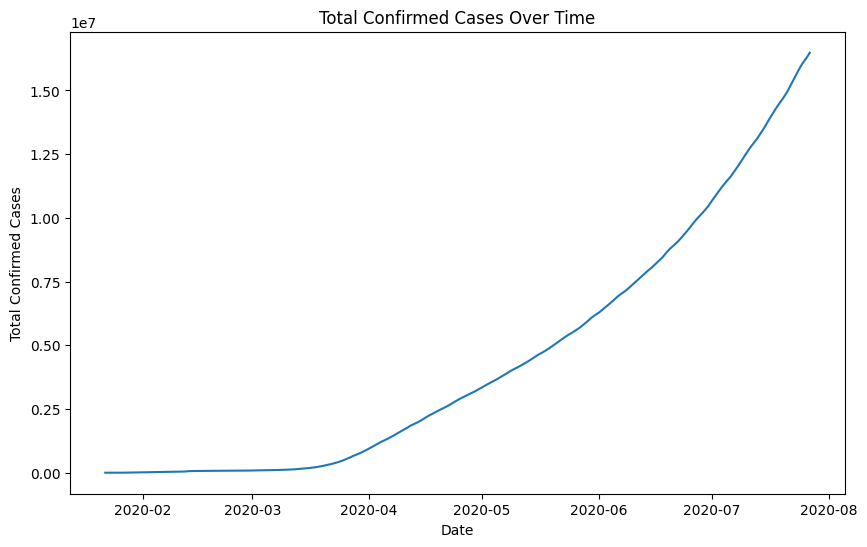

In [14]:
confirmed_over_time = df.groupby('Date')['Confirmed'].sum().reset_index() 
plt.figure(figsize=(10, 6)) 
sns.lineplot(x='Date', y='Confirmed', data=confirmed_over_time)
plt.title('Total Confirmed Cases Over Time')
plt.xlabel('Date') 
plt.ylabel('Total Confirmed Cases') 
plt.show()

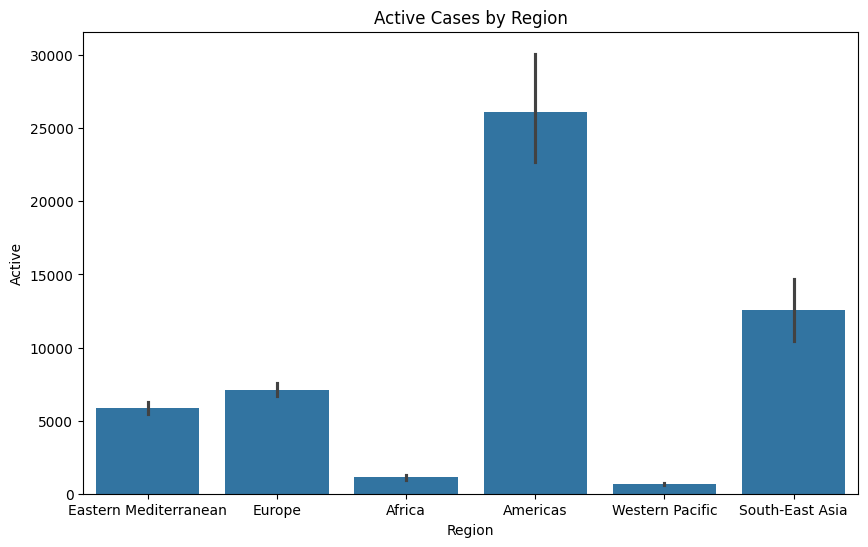

In [18]:
region = df["Who_Region"].unique()
filtered_region= df[df["Who_Region"].isin(region)]

plt.figure(figsize=(10, 6))
sns.barplot(x="Who_Region", y="Active", data=filtered_region)
plt.title('Active Cases by Region')
plt.xlabel("Region")
plt.ylabel("Active")
plt.show()

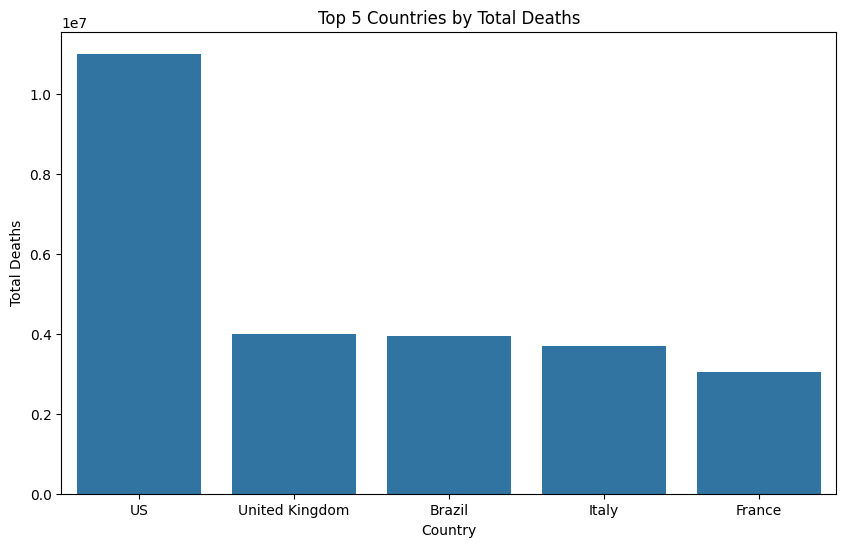

In [16]:
top_countries = df.groupby("Country_Region")["Deaths"].sum().reset_index()
top_countries = top_countries.sort_values(by="Deaths", ascending=False).head(5)
filtered_top_countries = df[df["Country_Region"].isin(top_countries["Country_Region"])]

plt.figure(figsize=(10, 6))
sns.barplot(x="Country_Region", y="Deaths", data=top_countries)
plt.title("Top 5 Countries by Total Deaths")
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.show()

In [17]:
df.to_csv('covid_19.csv', index=False)
print("Filtered data saved to co.csv.")

Filtered data saved to co.csv.
